In [1]:
%load_ext autoreload
%autoreload 2

import random
import networkx as nx
import numpy as np

from qiskit_optimization.applications.ising.tsp import TSP
from qiskit.algorithms import NumPyMinimumEigensolver
from qiskit_optimization.algorithms import MinimumEigenOptimizer, RecursiveMinimumEigenOptimizer, CplexOptimizer



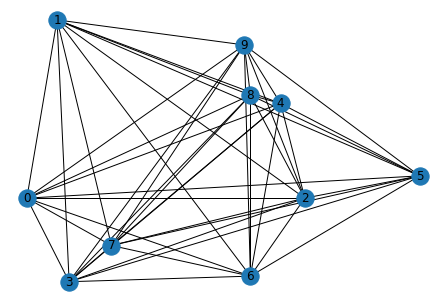

In [2]:
g=TSP.random_graph(n=10, seed=123)
#print([g.nodes[node]['pos']  for node in g.nodes])
pos=[g.nodes[node]['pos']  for node in g.nodes]
nx.draw(g, with_labels=True, pos=[g.nodes[node]['pos']  for node in g.nodes])
# for i, j in g.edges:
#     print(g.edges[i, j]['weight'])


In [3]:
tsp = TSP(g)
qp=tsp.to_quadratic_program()
qp

8_2 + 104 x_0_3*x_8_4 + 132 x_0_3*x_9_2 + 132 x_0_3*x_9_4
      + 128 x_0_4*x_1_3 + 128 x_0_4*x_1_5 + 92 x_0_4*x_2_3 + 92 x_0_4*x_2_5
      + 62 x_0_4*x_3_3 + 62 x_0_4*x_3_5 + 108 x_0_4*x_4_3 + 108 x_0_4*x_4_5
      + 130 x_0_4*x_5_3 + 130 x_0_4*x_5_5 + 92 x_0_4*x_6_3 + 92 x_0_4*x_6_5
      + 44 x_0_4*x_7_3 + 44 x_0_4*x_7_5 + 104 x_0_4*x_8_3 + 104 x_0_4*x_8_5
      + 132 x_0_4*x_9_3 + 132 x_0_4*x_9_5 + 128 x_0_5*x_1_4 + 128 x_0_5*x_1_6
      + 92 x_0_5*x_2_4 + 92 x_0_5*x_2_6 + 62 x_0_5*x_3_4 + 62 x_0_5*x_3_6
      + 108 x_0_5*x_4_4 + 108 x_0_5*x_4_6 + 130 x_0_5*x_5_4 + 130 x_0_5*x_5_6
      + 92 x_0_5*x_6_4 + 92 x_0_5*x_6_6 + 44 x_0_5*x_7_4 + 44 x_0_5*x_7_6
      + 104 x_0_5*x_8_4 + 104 x_0_5*x_8_6 + 132 x_0_5*x_9_4 + 132 x_0_5*x_9_6
      + 128 x_0_6*x_1_5 + 128 x_0_6*x_1_7 + 92 x_0_6*x_2_5 + 92 x_0_6*x_2_7
      + 62 x_0_6*x_3_5 + 62 x_0_6*x_3_7 + 108 x_0_6*x_4_5 + 108 x_0_6*x_4_7
      + 130 x_0_6*x_5_5 + 130 x_0_6*x_5_7 + 92 x_0_6*x_6_5 + 92 x_0_6*x_6_7
      + 44 x_0_6*x_7_5 + 44 

In [4]:
optimizer = CplexOptimizer()
result = optimizer.solve(qp)
result

optimal function value: 272.0
optimal value: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0.]
status: SUCCESS

In [5]:
tsp.interpret(result.x)

[3, 7, 0, 1, 9, 8, 4, 5, 2, 6]

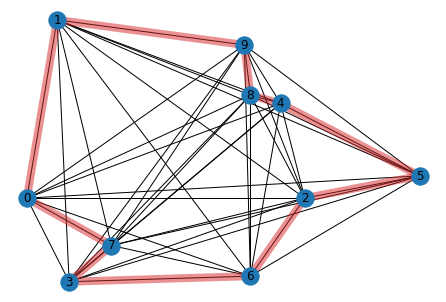

In [6]:
tsp.plot_graph(result.x, pos)

In [7]:
print(tsp.evaluate(result.x))
print(tsp.is_feasible(result.x))

272.0
True
